In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
1883,ham,"Come to me, slave. Your doing it again ... Goi..."
739,ham,Haha mayb u're rite... U know me well. Da feel...
633,ham,Got it. Seventeen pounds for seven hundred ml ...
4412,ham,Sad story of a Man - Last week was my b'day. M...
1276,ham,Can do lor...


In [4]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
df.sample(5)

,message_type,message
4533,ham,I have no money 4 steve mate! !
2997,ham,No b4 Thursday
695,ham,Good. Good job. I like entrepreneurs
2533,ham,Glad it went well :) come over at 11 then we'l...
4716,ham,"K will do, addie &amp; I are doing some art so..."


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

5179    0
2522    0
4453    0
782     0
1981    0
Name: message_type, dtype: int32

In [7]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
df.isnull().sum()
df.duplicated().sum()

403

In [9]:
df= df.drop_duplicates()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

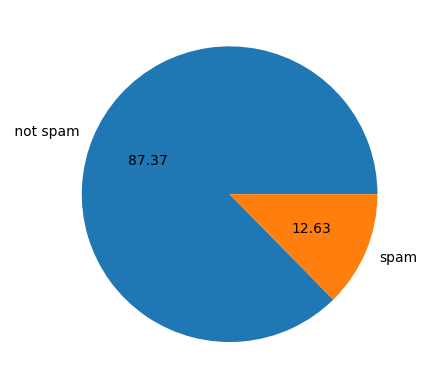

In [12]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [29]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [17]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
2115,0,Well I wasn't available as I washob nobbing wi...,107,24
294,0,I accidentally deleted the message. Resend ple...,50,9
2122,0,Do you know when the result.,28,7
745,0,Dunno he jus say go lido. Same time 930.,40,11
2644,0,My friends use to call the same.,32,8


In [18]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
1829,1,Hottest pics straight to your phone!! See me g...,151,32,3
668,0,Have a good evening! Ttyl,25,6,2
1025,0,I have a sore throat. It's scratches when I talk,48,12,2
1171,1,Got what it takes 2 take part in the WRC Rally...,159,38,3
1871,0,Dont know supports ass and srt i thnk. I think...,75,17,2


In [19]:
# for ham messages
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
# for spam messages
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

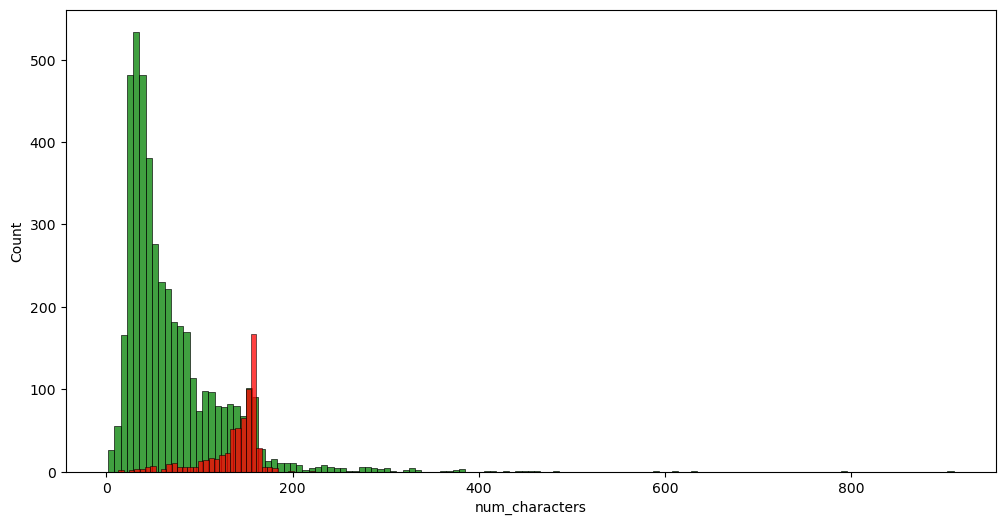

In [21]:
# for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'], color='green')
sns.histplot(df[df['message_type']==1]['num_characters'], color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

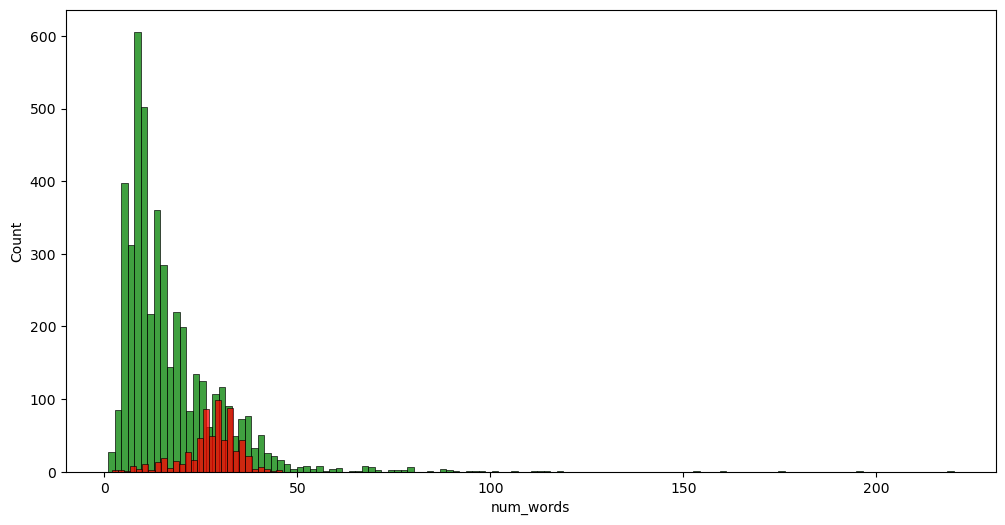

In [22]:
# for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'], color='green')
sns.histplot(df[df['message_type']==1]['num_words'], color='red')

C:\Users\Legion\AppData\Local\Temp\ipykernel_9492\4200606286.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

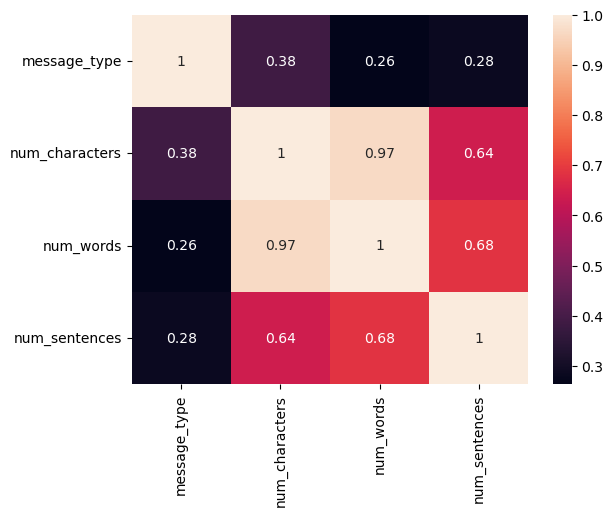

In [23]:
# plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [24]:
# Removing stop words and punctuations
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


179

In [25]:
# Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def text_transform(message):
  message=message.lower() #change to lowercase
  message=nltk.word_tokenize(message)

  y=[]
  for i in message:
    if i.isalnum():
      y.append(i)

    y.clear()

  # checking punctuations and stopwords
  for i in message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  message=y[:]
  y.clear()

  # stemming function
  for i in message:
    y.append(ps.stem(i))

  # return y --> returns as list
  return " ".join(y)

In [31]:
df['transformed_msg'] = df['message'].apply(text_transform)

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Plot word frequency of spam

In [34]:
spam_wc = wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

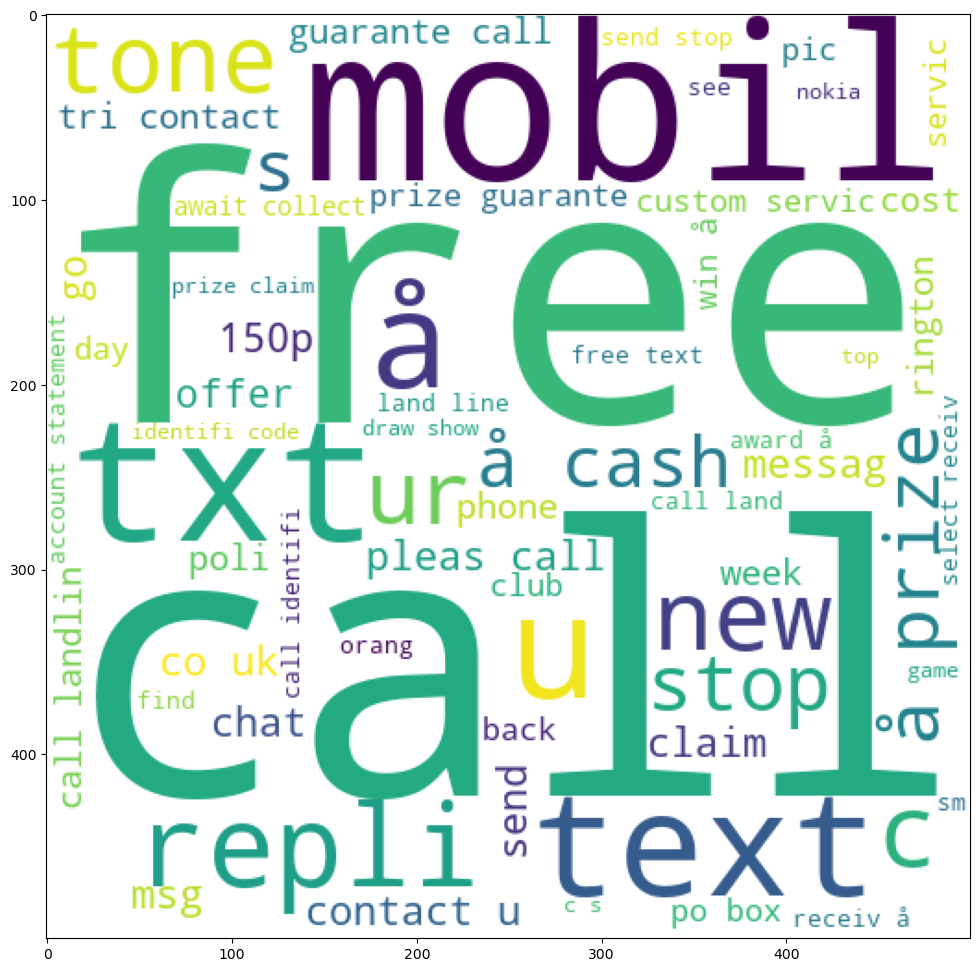

In [35]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

# Plot word frequency of Ham

In [36]:
ham_wc = wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

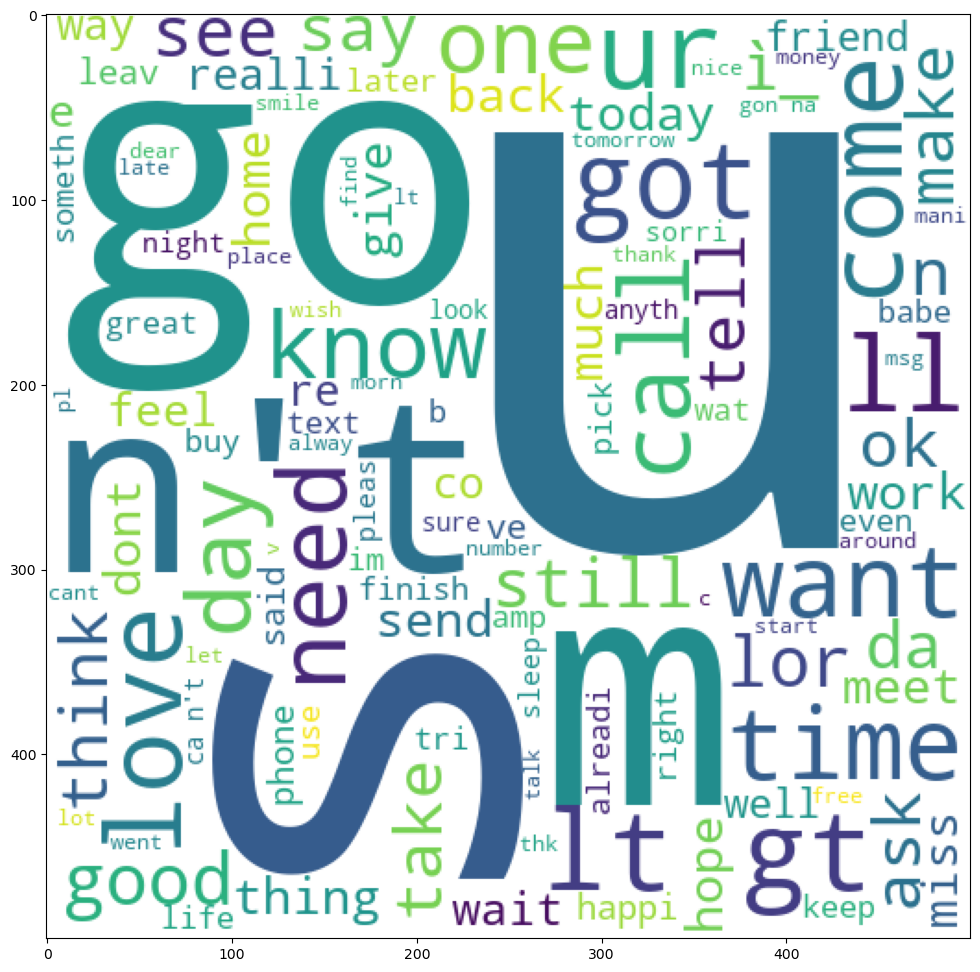

In [37]:
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [54]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
# plt.figure(figsize=(18,12))
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45)]

*Building a NB model, Since input has to be numerical, we will vectorize the spam/ham column*

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_msg']).toarray()
y = df['message_type'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [57]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [58]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ', accuracy_score(y_test, y_pred1))
print('Confusion Matrix of Gaussian NB is: ', confusion_matrix(y_test, y_pred1))
print('Precision score of Gaussian NB is: ', precision_score(y_test, y_pred1))

Accuracy score of Gaussian NB is:  0.8771760154738878
Confusion Matrix of Gaussian NB is:  [[788 108]
 [ 19 119]]
Precision score of Gaussian NB is:  0.5242290748898678


In [59]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ', accuracy_score(y_test, y_pred2))
print('Confusion Matrix of Multinomial NB is: ', confusion_matrix(y_test, y_pred2))
print('Precision score of Multinomial NB is: ', precision_score(y_test, y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of Multinomial NB is:  1.0


In [60]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ', accuracy_score(y_test, y_pred3))
print('Confusion Matrix of Bernoulli NB is: ', confusion_matrix(y_test, y_pred3))
print('Precision score of Bernoulli NB is: ', precision_score(y_test, y_pred3))

Accuracy score of Bernoulli NB is:  0.9874274661508704
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 13 125]]
Precision score of Bernoulli NB is:  1.0


In [64]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))